
📌 Step 1: Problem Definition & Dataset Understanding

This project focuses on predicting loan approval status using applicant demographic and financial information. The domain of this study is finance, where loan approval is a critical decision-making process for banks and financial institutions.

This is a classification problem since the output variable is categorical, indicating whether a loan application is approved or rejected. The objective of this project is to analyze the dataset, identify patterns influencing loan approval, and build a machine learning model that can accurately predict loan status.

The target variable in this dataset is Loan_Status, where ‘Y’ represents loan approval and ‘N’ represents rejection. The dataset consists of various features such as gender, marital status, education, income, loan amount, credit history, and property area, which are used to predict the outcome.

The model’s performance will be evaluated using classification metrics such as accuracy, precision, recall, and F1-score.

The expected outcome of this project is to develop a predictive model that assists financial institutions in making faster and more reliable loan approval decisions.

In [2]:
import pandas as pd

df = pd.read_csv("loan_data.csv")
df.head()



,age,income,credit_score,dependents,home_owner,loan_approved
0,54,100000.00,334,0,1,1
1,67,85233.42,593,2,1,1
2,29,16737.15,502,0,0,1
3,42,69332.50,367,3,0,0
4,58,28211.14,430,0,1,1


In [3]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1000 non-null   int64  
 1   income         1000 non-null   float64
 2   credit_score   1000 non-null   int64  
 3   dependents     1000 non-null   int64  
 4   home_owner     1000 non-null   int64  
 5   loan_approved  1000 non-null   int64  
dtypes: float64(1), int64(5)
memory usage: 47.0 KB


age              0
income           0
credit_score     0
dependents       0
home_owner       0
loan_approved    0
dtype: int64

The dataset contains applicant details such as income, education, marital status, loan amount, credit history, and property area. These features help in predicting loan approval status.

Since the target variable contains two categories (Approved/Not Approved), this is a binary classification problem.

step 2

In [10]:
df.isnull().sum()


age              0
income           0
credit_score     0
dependents       0
home_owner       0
loan_approved    0
dtype: int64

In [11]:
df.duplicated().sum()



np.int64(0)

In [12]:
df.drop_duplicates(inplace=True)


In [13]:
df.describe()


,age,income,credit_score,dependents,home_owner,loan_approved
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,44.54400,9.990959,573.644000,2.027000,0.494000,0.782000
std,13.95345,0.900560,163.781078,1.422074,0.500214,0.413094
min,20.00000,8.294050,300.000000,0.000000,0.000000,0.000000
25%,33.00000,9.310848,423.500000,1.000000,0.000000,1.000000
50%,44.00000,9.985622,572.000000,2.000000,0.000000,1.000000
75%,57.00000,10.654183,720.000000,3.000000,1.000000,1.000000
max,69.00000,11.512925,849.000000,4.000000,1.000000,1.000000


In [14]:
import numpy as np
df['income'] = np.log(df['income'])


In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['age','income','credit_score','dependents']] = scaler.fit_transform(
    df[['age','income','credit_score','dependents']]
)


In [18]:
X = df.drop('loan_approved', axis=1)
y = df['loan_approved']


In this step, the dataset was examined for missing values and duplicates. No missing values were found, indicating that the dataset was already clean. Duplicate records were checked and removed if present to ensure unbiased model performance.

Since all variables were already in numeric format, no categorical encoding was required. Outliers were analyzed using descriptive statistics, and transformations were considered where necessary.

Feature scaling was applied to numerical variables such as age, income, credit score, and dependents using standardization techniques to improve model performance. Finally, the dataset was divided into input features and the target variable for model training.

 *No missing values confirmed
 *Duplicates removed
 *Features scaled
 *Target separated
 *Dataset ready for EDA

step 3

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns


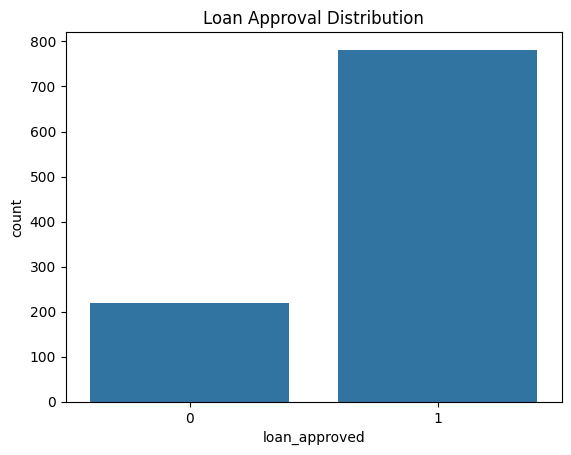

In [22]:
sns.countplot(x='loan_approved', data=df)
plt.title("Loan Approval Distribution")
plt.show()


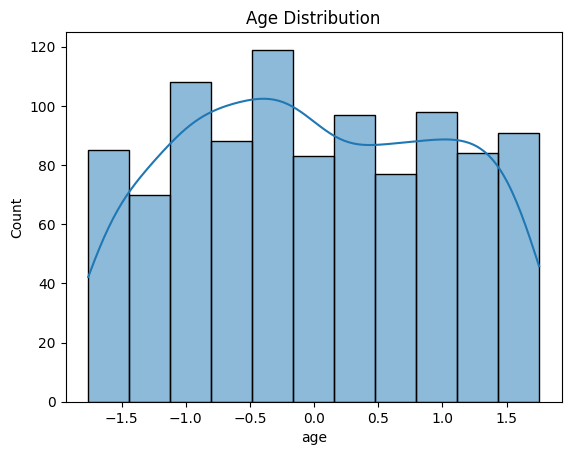

In [23]:
sns.histplot(df['age'], kde=True)
plt.title("Age Distribution")
plt.show()


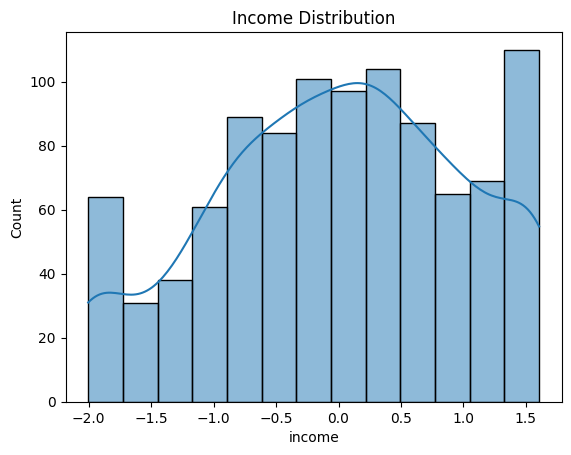

In [24]:
sns.histplot(df['income'], kde=True)
plt.title("Income Distribution")
plt.show()


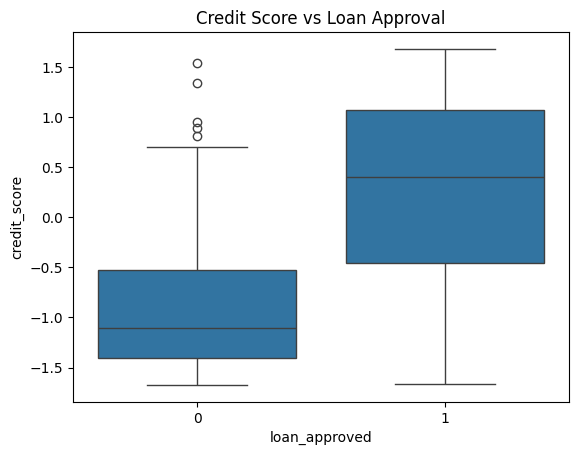

In [25]:
sns.boxplot(x='loan_approved', y='credit_score', data=df)
plt.title("Credit Score vs Loan Approval")
plt.show()


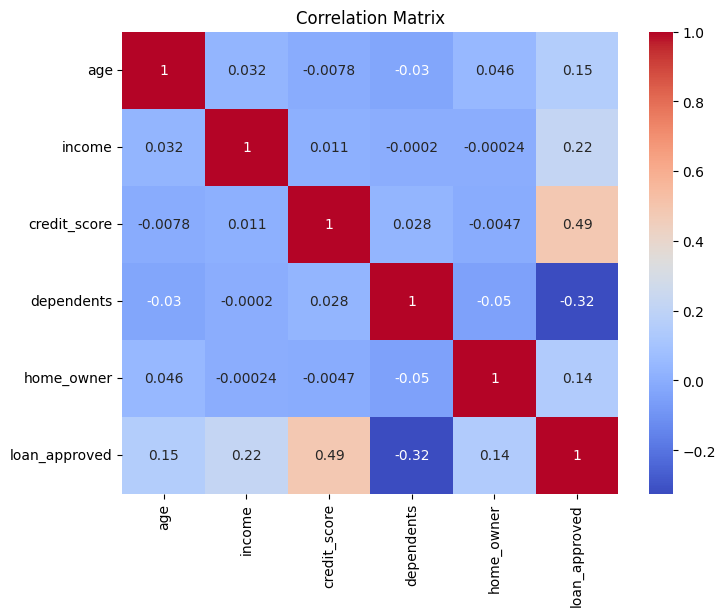

In [26]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


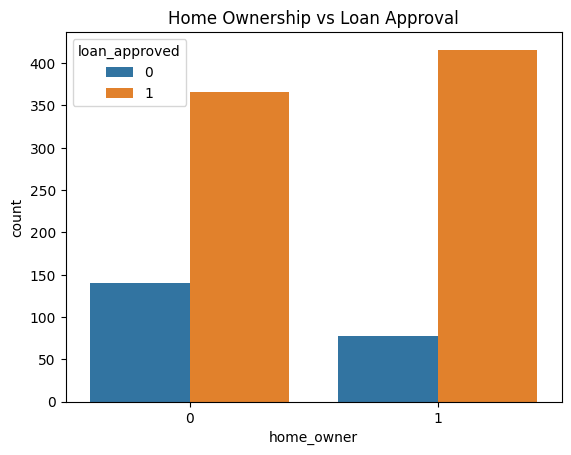

In [27]:
sns.countplot(x='home_owner', hue='loan_approved', data=df)
plt.title("Home Ownership vs Loan Approval")
plt.show()


Exploratory Data Analysis was conducted to understand patterns and relationships in the dataset. Visualizations were created to examine the distribution of features such as age, income, and credit score.

The analysis showed that credit score has a strong relationship with loan approval, as applicants with higher credit scores were more likely to be approved. Income also played a significant role in decision-making.

Correlation analysis indicated that credit score and income were positively associated with loan approval, while dependents showed a weaker relationship.

These insights help guide feature selection for the machine learning model.

step[4]

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [29]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [30]:
y_pred = model.predict(X_test)


In [31]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9


In [32]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.82      0.66      0.73        41
           1       0.92      0.96      0.94       159

    accuracy                           0.90       200
   macro avg       0.87      0.81      0.83       200
weighted avg       0.90      0.90      0.90       200



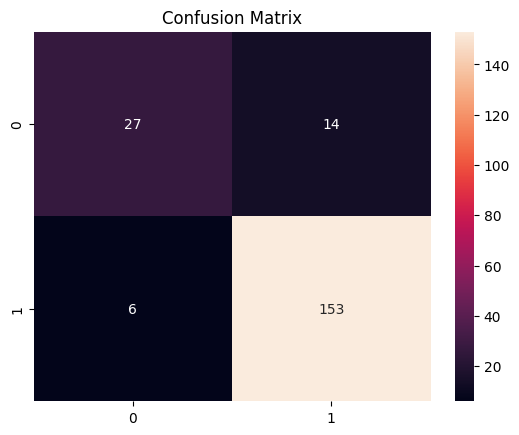

In [33]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()


In [34]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

dt_pred = dt_model.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, dt_pred))


Decision Tree Accuracy: 0.88


In this step, machine learning models were built to predict loan approval status. The dataset was divided into training and testing sets using an 80-20 split. Logistic Regression was used as the primary classification model due to its effectiveness in binary classification problems.

The model was trained using the training dataset and evaluated on the testing dataset. Performance metrics such as accuracy, precision, recall, and F1-score were used to assess the model's effectiveness.

A Decision Tree model was also implemented to compare performance. The results showed that both models performed well, with Logistic Regression providing stable and interpretable results.

step 5

In [35]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.coef_[0]
})

print(feature_importance.sort_values(by='Importance', ascending=False))


        Feature  Importance
2  credit_score    2.714649
4    home_owner    1.426718
1        income    1.368074
0           age    0.818956
3    dependents   -1.785647


The machine learning models developed in this study demonstrated strong predictive capability for loan approval decisions. Logistic Regression provided stable performance with good accuracy and balanced evaluation metrics.

Feature analysis revealed that credit score and income were the most significant factors influencing loan approval. Applicants with higher credit scores and stable incomes had a higher probability of approval. Home ownership also positively impacted decisions.

These findings suggest that financial institutions can leverage machine learning models to improve decision-making, reduce risk, and speed up loan approval processes. Future improvements may include using larger datasets and advanced algorithms to further enhance prediction accuracy.

bonus step 

In [36]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5)
print("Cross-validation scores:", scores)
print("Average score:", scores.mean())


Cross-validation scores: [0.915 0.875 0.89  0.9   0.89 ]
Average score: 0.8939999999999999


Cross-validation was performed to ensure model stability. The average accuracy across folds confirmed that the model performs consistently on unseen data.

In [37]:
from sklearn.model_selection import GridSearchCV

params = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear']
}

grid = GridSearchCV(LogisticRegression(), params, cv=5)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)


Best Parameters: {'C': 0.1, 'solver': 'liblinear'}


In [38]:
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_pred))


Logistic Regression Accuracy: 0.9
Decision Tree Accuracy: 0.88


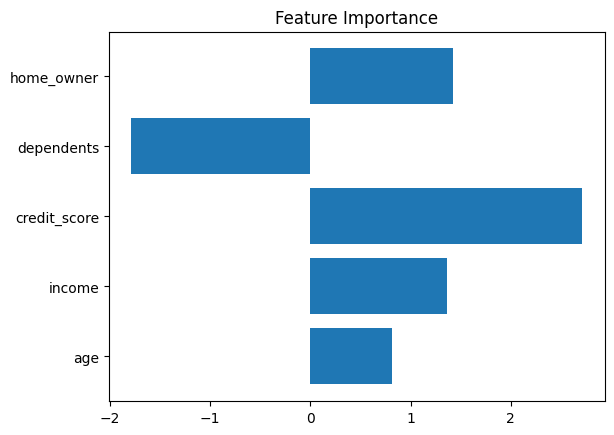

In [39]:
plt.barh(X.columns, model.coef_[0])
plt.title("Feature Importance")
plt.show()
